# Supervised learning (neural network)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('The user has loaded the data file "{name}" with a length of {length} bits'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart.csv to heart.csv
The user has loaded the data file "heart.csv" with a length of 38114 bits


#Attribute Information

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
#Loading data
dataset = pd.read_csv('heart.csv')

In [ ]:
import matplotlib.pyplot as plt

(1025, 14)
   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0
5   58    0   0       100   248    0  ...      0      1.0      1   0     2       1
6   58    1   0       114   318    0  ...      0      4.4      0   3     1       0
7   55    1   0       160   289    0  ...      1      0.8      1   1     3       0
8   46    1   0       120   249    0  ...      0      0.8      2   0     3       0
9   54    1   0       122   286    0  ...      1      3.2      1   2     2       0

[10 rows x 14 columns]
               age          sex  ...         thal   

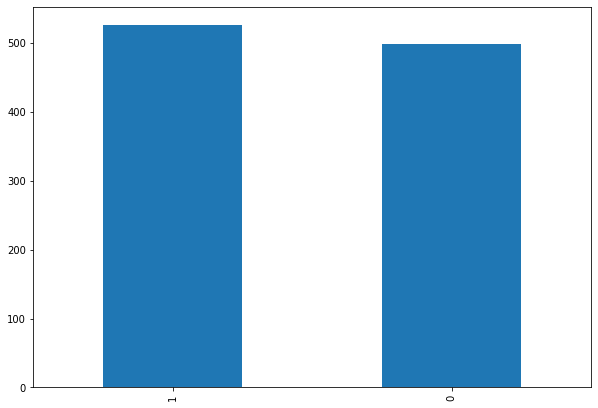

In [ ]:
#Columns and rows in the data
print(dataset.shape)
#Top 10 rows
print(dataset.head(10))
#Main data matrices
print(dataset.describe())
#Class distribution
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
print(dataset.groupby('target').size())
dataset['target'].value_counts().plot.bar()

In [ ]:
print('The proportion of classes:')
print(dataset['target'].value_counts() / len(dataset))

The proportion of classes:
1    0.513171
0    0.486829
Name: target, dtype: float64


In [ ]:
#Data types
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [ ]:
#Number of missing data points per column
missing_values_count = dataset.isnull().sum()
print(missing_values_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


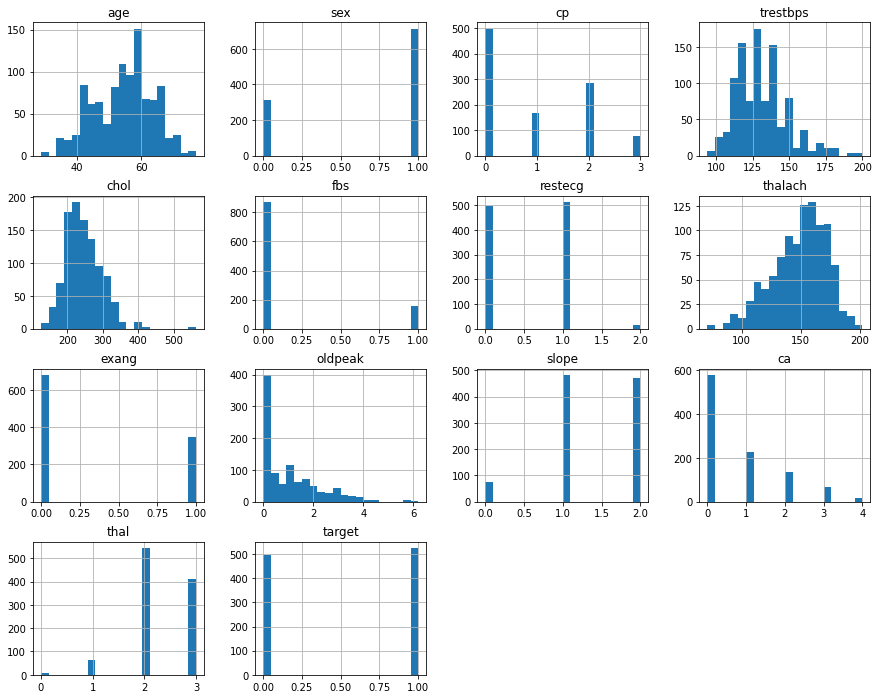

In [ ]:
#Histograms
dataset.hist(figsize=(15,12),bins = 20)
plt.title("Distribution features")
plt.show()

#Pre-processing of data

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
from sklearn import model_selection

In [ ]:
splits = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = splits
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(768, 13) (257, 13) (768,) (257,)


In [ ]:
X_train[0]

array([ 67. ,   1. ,   0. , 160. , 286. ,   0. ,   0. , 108. ,   1. ,
         1.5,   1. ,   3. ,   2. ])

In [ ]:
#The function scales the data
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train[0]

array([ 1.3756016 ,  0.64371161, -0.92094523,  1.62858941,  0.80373723,
       -0.42179866, -0.97469677, -1.7805804 ,  1.3937463 ,  0.41978909,
       -0.66196846,  2.16167937, -0.52198613])

#Construction of a neural network



In [ ]:
import keras
keras.__version__
from keras import models
from keras import layers

In [ ]:
#Two hidden layers and 13 artifacts input vector
model = models.Sequential()
model.add(layers.Dense(12, activation='relu', input_shape=(13,)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Validation on 150 samples
x_val = X_train[:150]
partial_x_train = X_train[150:]

y_val = y_train[:150]
partial_y_train = y_train[150:]

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=75,batch_size=12,validation_data=(x_val, y_val))

Epoch 1/75
52/52 [==============================] - 16s 12ms/step - loss: 0.6078 - accuracy: 0.6490 - val_loss: 0.5642 - val_accuracy: 0.7333
Epoch 2/75
52/52 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7813 - val_loss: 0.4913 - val_accuracy: 0.7667
Epoch 3/75
52/52 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7675 - val_loss: 0.4462 - val_accuracy: 0.7667
Epoch 4/75
52/52 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8016 - val_loss: 0.4155 - val_accuracy: 0.7933
Epoch 5/75
52/52 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8165 - val_loss: 0.3943 - val_accuracy: 0.8267
Epoch 6/75
52/52 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.7875 - val_loss: 0.3751 - val_accuracy: 0.8267
Epoch 7/75
52/52 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.7916 - val_loss: 0.3528 - val_accuracy: 0.8800
Epoch 8/75
52/52 [

#Analysis of the results

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

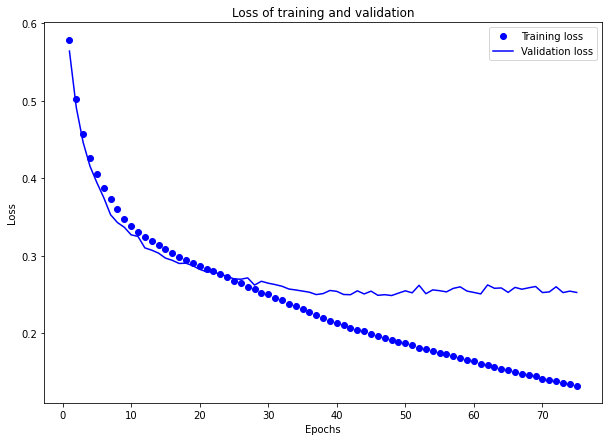

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#The parameter 'bo' defines the dashed line in the form of blue dots.
plt.plot(epochs, loss, 'bo', label='Training loss')
#The parameter 'b' defines a solid blue line.
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss of training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

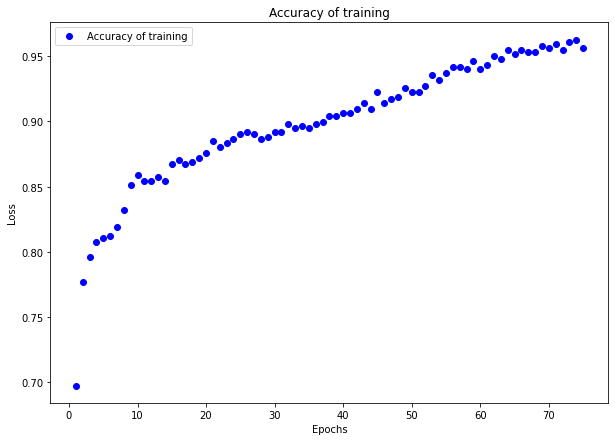

In [ ]:
plt.clf() #Cleaning up the drawing
acc_values = history_dict['accuracy']

plt.plot(epochs, acc, 'bo', label='Accuracy of training')
plt.title('Accuracy of training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

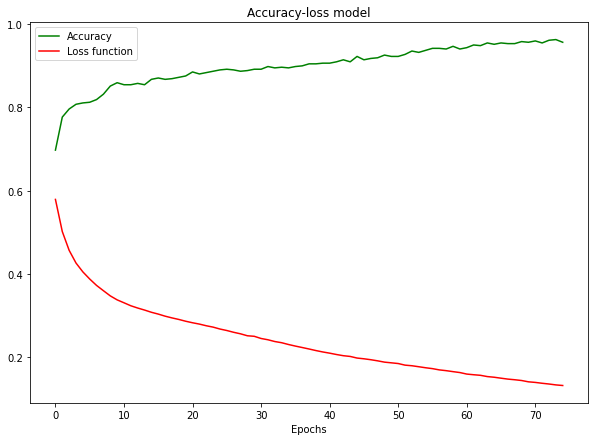

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],'green')
plt.plot(history.history['loss'],'red')
plt.title('Accuracy-loss model')
plt.xlabel('Epochs')
plt.legend(['Accuracy','Loss function'])
plt.show()

In [ ]:
#Predict test suite results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5) #Because the output is a probability
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))
print("Classification (neural network):")
print("Accuracy = ", accuracy)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       123
           1       0.96      0.99      0.97       134

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257

Classification (neural network):
Accuracy =  0.9688715953307393
[[117   6]
 [  2 132]]
